# Data Analysis Project!

In [886]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [888]:
df = pd.read_csv('AppsClub_events_data.csv')
df = df.set_index("Session ID")
df.isna().any()

Event Name         False
Date               False
Attendees Count     True
Rating              True
Speaker            False
New Attendees      False
Online/Offline      True
Duration           False
dtype: bool

#### Let's see how many missing values we have

In [891]:
df.isna().sum()

Event Name         0
Date               0
Attendees Count    1
Rating             3
Speaker            0
New Attendees      0
Online/Offline     3
Duration           0
dtype: int64

#### Attendees Count and Rating are numerical while Online/Offline is categorical

In [894]:
df["Attendees Count"] = df["Attendees Count"].fillna(df["Attendees Count"].mean()).round(0).astype('Int64')
df["Rating"] = df["Rating"].fillna(df["Rating"].mean()).round(1)
# If we look at the dataframe now, we'll find that Attendees Count became a float because of the average value we used to fill
# So to fix that I converted the mean to an int, and rounded the one for Rating so it matches the rest

In [896]:
frequency = df["Online/Offline"].value_counts()
print(frequency)

Online/Offline
Offline    32
Online     11
Name: count, dtype: int64


In [898]:
# Offline is more frequent, so we'll use it to fill the missing values
df["Online/Offline"] = df["Online/Offline"].fillna("Offline")

#### If we run df we'll see that all missing values have been filled correctly, but that takes too long so here you go

In [901]:
df.isna().sum()

Event Name         0
Date               0
Attendees Count    0
Rating             0
Speaker            0
New Attendees      0
Online/Offline     0
Duration           0
dtype: int64

#### Now that we've prepared the csv file, it's analysis time

In [904]:
by_event = df.groupby("Event Name")
by_type = df.groupby("Online/Offline")

#### Average Attendees by event

In [907]:
avg_attendance_by_event = by_event["Attendees Count"].mean().round(2)
avg_attendance_by_event

Event Name
AppsChill                      25.0
Biweekly Contest               20.0
CP Bootcamp                    57.5
Conference                    150.0
Cyber Security Foundations    31.17
Intro to CS                   50.18
Intro to Data                 26.25
Java                           20.0
Let's Talk                     80.0
Meet Our Laureat               70.0
PFA-PFE                       100.0
Python Basics                 34.89
Visite Code 212                70.0
Name: Attendees Count, dtype: Float64

#### Average Rating by event

In [909]:
avg_rating_by_event = by_event["Rating"].mean().round(2)
avg_rating_by_event

Event Name
AppsChill                     4.50
Biweekly Contest              4.30
CP Bootcamp                   4.70
Conference                    5.00
Cyber Security Foundations    4.35
Intro to CS                   4.18
Intro to Data                 3.95
Java                          4.13
Let's Talk                    5.00
Meet Our Laureat              4.90
PFA-PFE                       4.90
Python Basics                 4.38
Visite Code 212               4.00
Name: Rating, dtype: float64

#### Average Attendees (Online vs. Offline)

In [911]:
avg_attendance_by_type = by_type["Attendees Count"].mean().round(2)
avg_attendance_by_type

Online/Offline
Offline    46.37
Online     27.73
Name: Attendees Count, dtype: Float64

#### Average Rating (Online vs. Offline)

In [913]:
avg_rating_by_type = by_type["Rating"].mean().round(2)
avg_rating_by_type

Online/Offline
Offline    4.27
Online     4.48
Name: Rating, dtype: float64

#### Events ranked by attendance

In [915]:
events_ranked = avg_attendance_by_event.sort_values(ascending=False)
events_ranked

Event Name
Conference                    150.0
PFA-PFE                       100.0
Let's Talk                     80.0
Meet Our Laureat               70.0
Visite Code 212                70.0
CP Bootcamp                    57.5
Intro to CS                   50.18
Python Basics                 34.89
Cyber Security Foundations    31.17
Intro to Data                 26.25
AppsChill                      25.0
Biweekly Contest               20.0
Java                           20.0
Name: Attendees Count, dtype: Float64

#### Top 5 most attended events

In [917]:
events_ranked.head(5)

Event Name
Conference          150.0
PFA-PFE             100.0
Let's Talk           80.0
Meet Our Laureat     70.0
Visite Code 212      70.0
Name: Attendees Count, dtype: Float64

#### Bottom 5 least attended events

In [919]:
events_ranked.tail(5)

Event Name
Cyber Security Foundations    31.17
Intro to Data                 26.25
AppsChill                      25.0
Biweekly Contest               20.0
Java                           20.0
Name: Attendees Count, dtype: Float64

#### Analysis over, plotting time

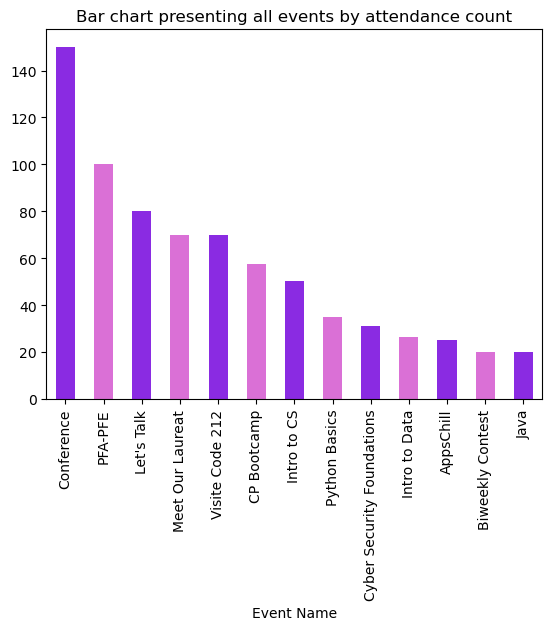

In [921]:
# had to use the AppsClub color palette hhhhhhhhh
events_ranked.plot(title="Bar chart presenting all events by attendance count", kind="bar", x="Event Name", y="Attendees Count", color=["blueviolet","orchid"])
plt.show()

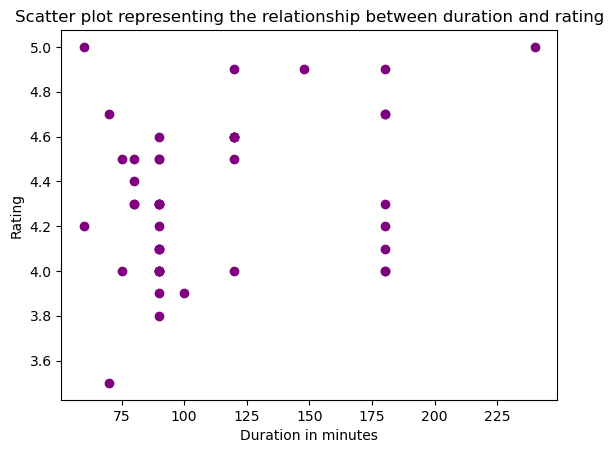

In [922]:
plt.scatter(df["Duration"], df["Rating"], color="purple")
plt.title("Scatter plot representing the relationship between duration and rating")
plt.xlabel("Duration in minutes")
plt.ylabel("Rating")
plt.show()

#### Now we're analysing the people in charge

#### Occurences of each member

In [934]:
speakers = df["Speaker"].value_counts()
speakers

Speaker
Amine Ait Hamma        15
Hasnae Amarmach         9
Ilyas Nmili             8
Broad Sec Cell          6
Nohaila El Idrissi      4
Youssef Taguejgalet     4
Name: count, dtype: int64

#### Most active member

In [937]:
top_speaker = speakers[speakers == speakers.max()]
top_speaker

Speaker
Amine Ait Hamma    15
Name: count, dtype: int64

#### Highest rated member

In [940]:
grouped_by_speaker = df.groupby("Speaker")
rating_avg = grouped_by_speaker["Rating"].mean().round(2).sort_values(ascending=False)
rating_avg

Speaker
Youssef Taguejgalet    4.58
Ilyas Nmili            4.44
Amine Ait Hamma        4.37
Broad Sec Cell         4.35
Hasnae Amarmach        4.18
Nohaila El Idrissi     3.95
Name: Rating, dtype: float64

In [942]:
highest_rated = rating_avg[rating_avg == rating_avg.max()]
highest_rated

Speaker
Youssef Taguejgalet    4.58
Name: Rating, dtype: float64

#### New Attendees overtime

In [945]:
# The date format won't work so we need to change it
new_df = df
new_df["Date"] = pd.to_datetime(new_df["Date"], format='%d-%b-%Y')

In [947]:
# Much better, now let's sort
by_date = new_df.sort_values("Date")
by_date.head()

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
42,Meet Our Laureat,2024-10-05,70,4.9,Ilyas Nmili,30,Online,148
1,Intro to CS,2024-10-07,50,4.2,Ilyas Nmili,10,Offline,60
12,Python Basics,2024-10-08,80,4.6,Amine Ait Hamma,20,Offline,90
13,Python Basics,2024-10-12,10,4.6,Amine Ait Hamma,5,Online,120
28,Biweekly Contest,2024-10-12,20,4.0,Ilyas Nmili,5,Offline,180


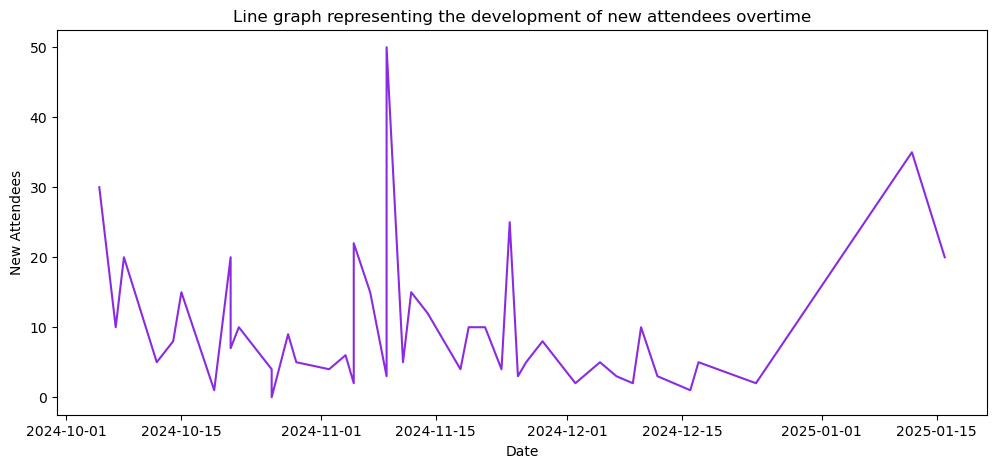

In [948]:
# plit plot, adjusted figure size cuz the text was overlapping and it didn't look nice
plt.figure(figsize=(12,5))
plt.plot(by_date["Date"], by_date["New Attendees"], color="blueviolet")
plt.title("Line graph representing the development of new attendees overtime")
plt.xlabel("Date")
plt.ylabel("New Attendees")
plt.show()

## That was extremely fun, the only downside was that it was too short... And that's why I decided to add some more ideas and try to find the relationship between the various information we have and the days of the week!

#### I'd need to add a column with the day of the week of each session first, I can use datetime for that

In [979]:
df = by_date # idk why I made by_date in the first place
df["Day"] = df["Date"].dt.day_name()
df.head()

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration,Day,Cumulative Events
Session ID,,,,,,,,,,
42,Meet Our Laureat,2024-10-05,70,4.9,Ilyas Nmili,30,Online,148,Saturday,1
1,Intro to CS,2024-10-07,50,4.2,Ilyas Nmili,10,Offline,60,Monday,2
12,Python Basics,2024-10-08,80,4.6,Amine Ait Hamma,20,Offline,90,Tuesday,3
13,Python Basics,2024-10-12,10,4.6,Amine Ait Hamma,5,Online,120,Saturday,4
28,Biweekly Contest,2024-10-12,20,4.0,Ilyas Nmili,5,Offline,180,Saturday,5


#### Which day of the week is the most *eventful*? (pun intended)

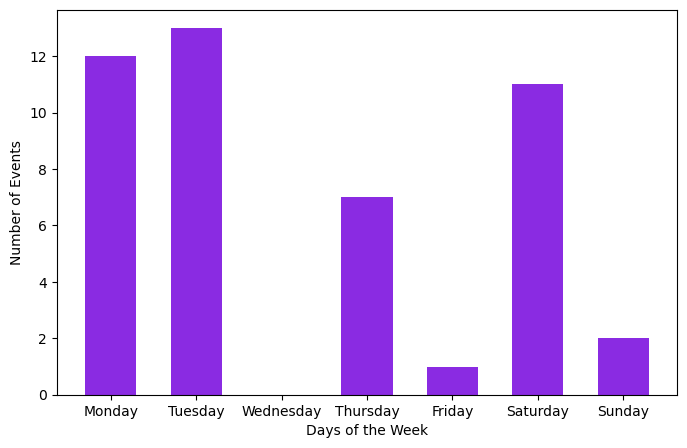

In [982]:
days_in_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# here I reorder events_per_day so it can be in the correct day order, then fill the empty values with 0 (Wednesday, since no events are organized on it)
# and then I go ahead and plot it out, same thing repeats for the next few ones

events_per_day = df["Day"].value_counts()
events_per_day = events_per_day.reindex(days_in_order, fill_value=0)

plt.figure(figsize=(8,5))
plt.bar(events_per_day.index, events_per_day.values, color="blueviolet", width=0.6)
plt.ylabel("Number of Events")
plt.xlabel("Days of the Week")
plt.show()

#### Which day of the week has the most attendance?

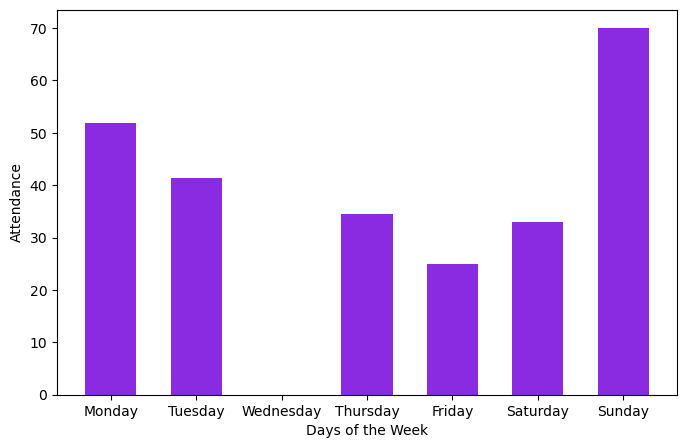

In [985]:
grouped_by_day = df.groupby("Day")
avg_attendance_by_day = grouped_by_day["Attendees Count"].mean().round(2)
avg_attendance_by_day = avg_attendance_by_day.reindex(days_in_order, fill_value=0)

plt.figure(figsize=(8,5))
plt.bar(avg_attendance_by_day.index, avg_attendance_by_day.values, color="blueviolet", width=0.6)
plt.ylabel("Attendance")
plt.xlabel("Days of the Week")
plt.show()

#### Which day of the week has the highest average rating?

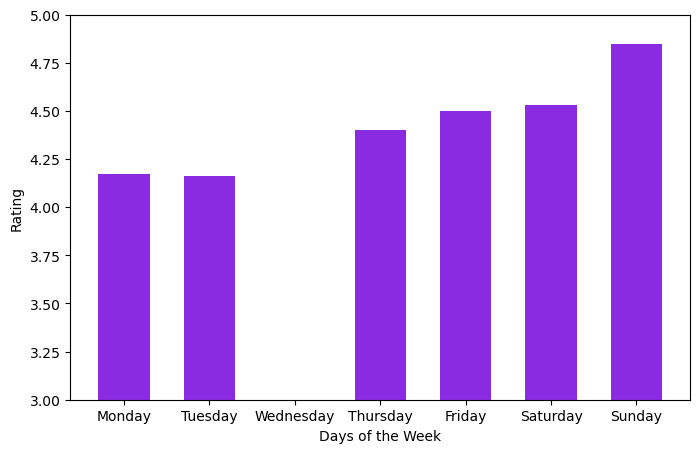

In [988]:
avg_rating_by_day = grouped_by_day["Rating"].mean().round(2)
avg_rating_by_day = avg_rating_by_day.reindex(days_in_order, fill_value=0)

plt.figure(figsize=(8,5))
plt.bar(avg_rating_by_day.index, avg_rating_by_day.values, color="blueviolet", width=0.6)
plt.ylabel("Rating")
plt.ylim(3, 5)
plt.xlabel("Days of the Week")
plt.show()

#### Development of events overtime

In [991]:
# df is already sorted by date, we need to add a new column with cumulative events
df["Cumulative Events"] = range(1, len(df)+1) # we're just adding 1 for each event

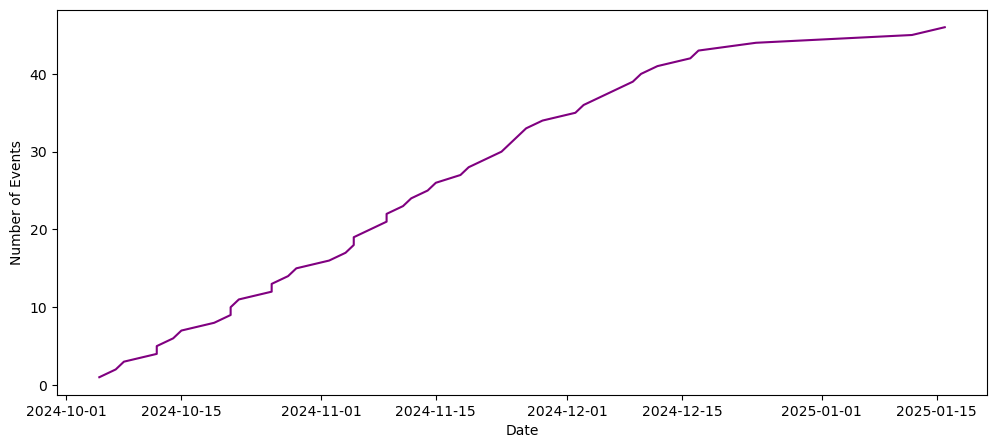

In [993]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Cumulative Events"], color="purple")
plt.ylabel("Number of Events")
plt.xlabel("Date")
plt.show()
# exam weeks are very visible lol

#### Which day is each member's favorite?

In [1020]:
grouped_by_day_and_speaker = df.groupby(["Speaker", "Day"]).size()
grouped_by_day_and_speaker

Speaker              Day     
Amine Ait Hamma      Saturday    6
                     Sunday      1
                     Tuesday     8
Broad Sec Cell       Thursday    6
Hasnae Amarmach      Monday      9
Ilyas Nmili          Monday      3
                     Saturday    3
                     Sunday      1
                     Tuesday     1
Nohaila El Idrissi   Tuesday     4
Youssef Taguejgalet  Friday      1
                     Saturday    2
                     Thursday    1
dtype: int64

In [1046]:
# That's too complicated, lemme see
grouped_by_day_and_speaker_by_speaker = grouped_by_day_and_speaker.groupby("Speaker").idxmax()
# I'm great at naming things as you can see
# Kept tinkering with it until it worked
speaker_group = grouped_by_day_and_speaker_by_speaker
for speaker, day in speaker_group:
    print(f"Speaker {speaker} likes to speak on {day}s!")

Speaker Amine Ait Hamma likes to speak on Tuesdays!
Speaker Broad Sec Cell likes to speak on Thursdays!
Speaker Hasnae Amarmach likes to speak on Mondays!
Speaker Ilyas Nmili likes to speak on Mondays!
Speaker Nohaila El Idrissi likes to speak on Tuesdays!
Speaker Youssef Taguejgalet likes to speak on Saturdays!


# Fun stuff